In [14]:
import numpy as np
import re, itertools
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import random

In [2]:
# load the text book in from file
with open('Alice.txt', 'r', encoding='utf8') as rf:
    text = rf.read()

In [3]:
text = text[text.find("CHAPTER I.")+len("CHAPTER I."):text.find("END OF THE PROJECT GUTENBERG EBOOK ALICE’S ADVENTURES IN WONDERLAND")].strip()

In [4]:
#Split the text into chapter and paragraph
Chapters = re.split(r"CHAPTER \w+\.", text)[1:]

#Split Paragraph
Paragraphs = text.split("\n")

In [5]:
#Load and read Charectors
with open('charecter2.txt', 'r', encoding= 'utf8') as rf:
    Charectors = rf.read().split("\n")
    Charectors = [Charectors.split(", ") for Charectors in Charectors]

In [6]:
print(Charectors)

[['Alice'], ['White Rabbit'], ['Mouse'], ['Dodo'], ['Lory'], ['Eaglet'], ['Duck'], ['Pat'], ['Bill'], ['puppy'], ['Caterpillar'], ['Duchess'], ['Cheshire Cat'], ['Hatter'], ['March Hare'], ['Dormouse'], ['Queen'], ['King'], ['Knave'], ['Gryphon'], ['Mock Turtle']]


In [7]:
#Count the number of the 
# create a dictionary to store the character counts
character_counts = {}
for character in Charectors:
    first_name = character[0]
    character_counts[first_name] = 0

# count the characters in each chapter
for i, chapter in enumerate(Chapters):
    for character in character_counts:
        character_counts[character] += chapter.count(character)

# create a pandas DataFrame to store the character counts
df_character_counts = pd.DataFrame({'Character': list(character_counts.keys()), 'Count': list(character_counts.values())})

# display the DataFrame
display(df_character_counts)    
    

,Character,Count
0,Alice,369
1,White Rabbit,18
2,Mouse,30
3,Dodo,13
4,Lory,7
5,Eaglet,3
6,Duck,3
7,Pat,3
8,Bill,16
9,puppy,7


In [8]:
# create a dictionary to store the character counts
character_counts = {}
for character in Charectors:
    first_name = character[0]
    character_counts[first_name] = {f"Chapter {i+1}": 0 for i in range(len(Chapters))}

# count the characters in each chapter
for i, chapter in enumerate(Chapters):
    for character in character_counts:
        character_counts[character][f"Chapter {i+1}"] += chapter.count(character)

# create a pandas DataFrame to store the character counts
df_character_counts = pd.DataFrame(character_counts).T

# display the DataFrame
display(df_character_counts)

,Chapter 1,Chapter 2,Chapter 3,Chapter 4,Chapter 5,Chapter 6,Chapter 7,Chapter 8,Chapter 9,Chapter 10,Chapter 11
Alice,26,23,31,35,43,51,39,52,30,16,23
White Rabbit,0,0,1,0,0,0,2,0,1,7,7
Mouse,11,18,0,0,0,0,0,0,0,0,1
Dodo,1,12,0,0,0,0,0,0,0,0,0
Lory,1,6,0,0,0,0,0,0,0,0,0
Eaglet,1,2,0,0,0,0,0,0,0,0,0
Duck,1,2,0,0,0,0,0,0,0,0,0
Pat,0,0,3,0,0,0,0,0,0,0,0
Bill,0,0,14,0,0,0,0,0,0,1,1
puppy,0,0,7,0,0,0,0,0,0,0,0


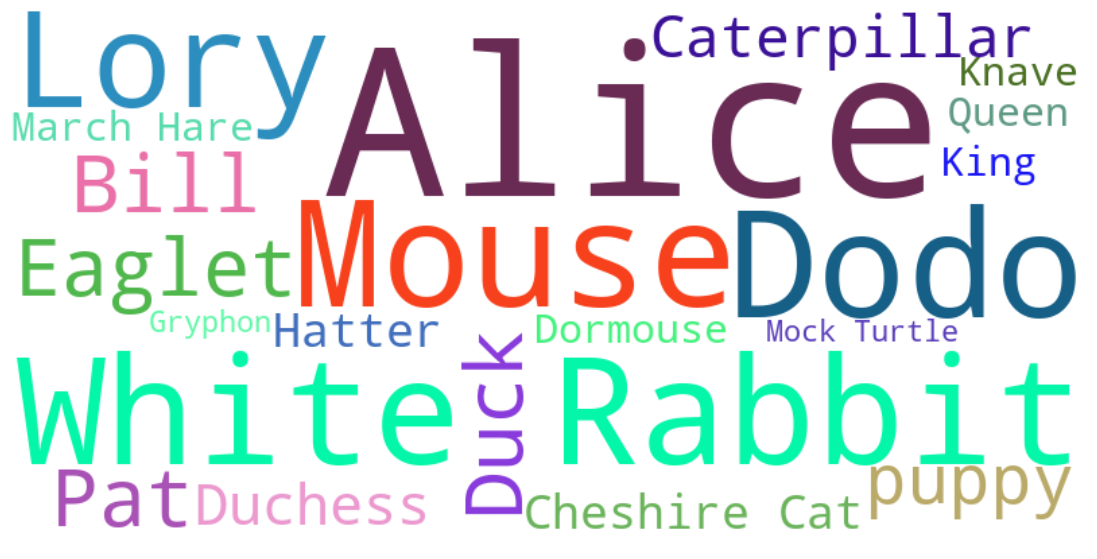

In [16]:


# create a dictionary to store the character counts
character_counts = {}
for character in Charectors:
    first_name = character[0]
    if first_name in character_counts:
        character_counts[first_name] += 1
    else:
        character_counts[first_name] = 1

# define the color function
def color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    # generate a random color
    r = random.randint(0, 255)
    g = random.randint(0, 255)
    b = random.randint(0, 255)
    return f"rgb({r}, {g}, {b})"

# create the word cloud
if character_counts:
    max_frequency = float(max(character_counts.values()))
    frequencies = {k: v/max_frequency for k,v in character_counts.items()}
    wordcloud = WordCloud(width=800, height=400, background_color='white', prefer_horizontal=0.8, color_func=color_func).generate_from_frequencies(frequencies)

    # plot the word cloud
    plt.figure(figsize=(14,7))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()
else:
    print("No characters found!")
